<a href="https://colab.research.google.com/github/Jarvis017/Predicting-pass-or-fail-for-students-with-Neural-Network/blob/main/Pass_or_Fail_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import copy

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 51.8MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
df['Class'] = df['Class'].replace('H','M')
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,1
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,1
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,0
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,0
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,1


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)



In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

normalizing data

In [ ]:
def normalize(X):
  miu = (1/(X.shape[1])) * np.sum(X)
  sigma = np.sqrt( (1/(X.shape[1])) * np.sum(np.power(X - miu,2)) )
  X = (X - miu) / sigma

  return X

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_val = ", X_val.shape)
print("y_val = ", y_val.shape)
print("------")
X_train = X_train.T
X_val = X_val.T

y_val = y_val.reshape(len(y_val),1)
y_val = y_val.T

y_train = y_train.reshape(len(y_train),1)
y_train = y_train.T

print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_val = ", X_val.shape)
print("y_val = ", y_val.shape)
print("-----")
#X_train = normalize(X_train)
#X_val = normalize(X_val)
#y_train = normalize(y_train)
#y_val = normalize(y_val)

############### change dimensions ###########




Number of dataset:  480
Number of train set:  384
Number of validation set:  96
X_train =  (384, 16)
y_train =  (384,)
X_val =  (96, 16)
y_val =  (96,)
------
X_train =  (16, 384)
y_train =  (1, 384)
X_val =  (16, 96)
y_val =  (1, 96)
-----


# ***Implementing Model***
#implementing functions


### **sigmoid function**

In [ ]:
def sigmoid(Z):
  A = 1/ (1+np.exp(-Z))
  cache = Z        # save for backward propagation
  return A, cache

### **relu function**

In [ ]:
def relu(Z):
  A = np.maximum(Z, 0)
  cache = Z           # save for backward propagation
  return A, cache

### **initializing parameters**

In [ ]:
def initialize_param(layer_size):
  parameters = {}
  for i in range(1, len(layer_size)):
    parameters['W' + str(i)] = np.random.randn(layer_size[i], layer_size[i-1])*0.02
    parameters['b' + str(i)] = np.zeros((layer_size[i], 1))

  return parameters

### **initializing parameters (zero vesion)**

In [ ]:
def initialize_param_zero(layer_size):
  parameters = {}
  for i in range(1, len(layer_size)):
    parameters['W' + str(i)] = np.zeros((layer_size[i], layer_size[i-1]))
    parameters['b' + str(i)] = np.zeros((layer_size[i], 1))

  return parameters


### **activation forward**

In [ ]:
def activation_forward(prev_A, activation_type, W, b):

  # if activation is calculated in hidden layer
  if activation_type == "relu":
    Z = np.dot(W, prev_A) + b
    cache_1 = (prev_A, W, b)
    A, cache_2 = relu(Z)

  # if activation is calculated in output layer
  elif activation_type == "sigmoid":
    Z = np.dot(W, prev_A) + b
    cache_1 = (prev_A, W, b)
    A, cache_2 = sigmoid(Z)

  # for backprop usage
  cache = (cache_1, cache_2)
  return A, cache

### **forward propagation**

In [ ]:
def forward_propagation(X, parameters):

  layers_num = len(parameters) // 2   # number of the layers

  A = X
  caches = []                         # save caches for backprop

  for i in range(1, layers_num):
    prev_A = A

    # hidden layers activation
    A, cache = activation_forward(prev_A, "relu", parameters['W' + str(i)], parameters['b' + str(i)])
    caches.append(cache)

  # output layer activation
  A_last, cache = activation_forward(A, "sigmoid", parameters['W' + str(layers_num)], parameters['b' + str(layers_num)])
  caches.append(cache)


  return A_last, caches


### **Relu backward**

In [ ]:
def relu_backward(dA, cache):
  Z = cache
  dZ = np.array(dA, copy=True)
  dZ[Z <= 0] = 0
  return dZ


### **Sigmoid backward**

In [ ]:
def sigmoid_backward(dA, Z_cache):
  sigm = 1/(1+np.exp(-Z_cache))
  dZ = dA * sigm * (1-sigm)
  return dZ

### **activaition backward**




In [ ]:
def activation_backward(dA, activation, cache):

  # restore caches
  Z_cache, activation_cache = cache
  previous_dA, W, b = Z_cache

  if activation == "relu":

    # compute derivative of relu
    dZ = relu_backward(dA, activation_cache)

  elif activation == "sigmoid":

    dZ = sigmoid_backward(dA, activation_cache)

  # number of example
  m = previous_dA.shape[1]

  # compute derivatives
  dW = (1/m) * np.dot(dZ, previous_dA.T)
  db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
  previous_dA = np.dot(W.T, dZ)

  return previous_dA, dW, db



### **backward propagation**





In [ ]:
def backward_propagation(Last_activation, caches, Y):

    Layer_num = len(caches)

    # derivative of last activation
    dAL = - (np.divide(Y, Last_activation) - np.divide(1 - Y, 1 - Last_activation))

    # selecting last cache
    cache = caches[Layer_num-1]

    # apply backward propagation on sigmoid
    previous_dA, dW_temp, db_temp = activation_backward(dAL, "sigmoid", cache)
    gradiant = {}
    gradiant["dA" + str(Layer_num-1)] = previous_dA
    gradiant["dW" + str(Layer_num)] = dW_temp
    gradiant["db" + str(Layer_num)] = db_temp

    for l in reversed(range(Layer_num-1)):

      # select last cache
      cache = caches[l]

      #compute derivative of layers (relu)
      dA_prev_temp, dW_tempp, db_tempp = activation_backward(dA = gradiant["dA" + str(l + 1)], activation = "relu", cache = cache)
      gradiant["dA" + str(l)] = dA_prev_temp
      gradiant["dW" + str(l+1)] = dW_tempp
      gradiant["db" + str(l+1)] = db_tempp

    return gradiant

### **update the parameters**

In [ ]:
def update_parameters(parameters, gradiants, alpha):

  # size of the layers
  layer_num = len(parameters) // 2

  # updating the layers
  for i in range(layer_num):
    parameters["W"+ str(i+1)] = parameters["W"+ str(i+1)] - gradiants["dW"+ str(i+1)] * alpha
    parameters["b"+ str(i+1)] = parameters["b"+ str(i+1)] - gradiants["db"+ str(i+1)] * alpha

  return parameters

### **cost function**

In [ ]:
def cost_function(AL, Y):

  # number of examples
  m = Y.shape[1]

  # computing the cost
  cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))

  #remove redundant brackets
  cost = np.squeeze(cost)

  return cost

# ***Training the model***

### **compute accuracy**

In [ ]:
def acc(AL, y):

  pred = np.zeros((1,AL.shape[1]))

  for i in range(0, AL.shape[1]):
    if AL[0,i] > 0.5:
      pred[0,i] = 1
    else:
      pred[0,i] = 0
  return np.sum((pred == y)/AL.shape[1])

### **plotting the data (cost or accuracy)**

In [ ]:
def plotting(data, title, y):

  plt.plot(np.squeeze(data))
  plt.ylabel(y)
  plt.xlabel('iterations (per Hundreds)')
  plt.title(title)
  plt.show()
  print()



### **model**

In [ ]:
def model(X, Y, X_val, Y_val, layers_dims, alpha = 0.1, epoch = 4000,print_cost = False, param_initialize = "random"):

  # initializing parameters
  if param_initialize == "random":
    parameters = initialize_param(layers_dims)
  else:
    parameters = initialize_param_zero(layers_dims)
  all_cost_train = []
  all_accuracy_train = []
  all_cost_val = []
  all_accuracy_val = []

  for z in range(epoch+1):

    # forward propagation
    AL, caches = forward_propagation(X, parameters)

      # computing cost
    cost = cost_function(AL, Y)

      # backward propagation
    gradiants = backward_propagation(AL,caches,Y)

      # updating parameters
    parameters = update_parameters(parameters, gradiants, alpha)

    if z % 100 == 0 and print_cost:
      print ("Cost after iteration %i: %f" %(z, cost))

      #save the cost and accuracy of training
      all_cost_train.append(cost)
      all_accuracy_train.append(acc(AL, Y))

      #save the cost and accuracy of validation
      cost_val, accuracy = predict(X_val, Y_val, parameters)
      all_cost_val.append(cost_val)
      all_accuracy_val.append(accuracy)


  print()
  print()

  # plot the cost of training
  print("cost of train: " + str(all_cost_train[-1]))
  plotting(all_cost_train, "Alpha(train) = " + str(alpha),'cost')

  #plot the accuracy of training
  print("accuracy of train: "+ str(all_accuracy_train[-1]))
  plotting(all_accuracy_train, "accuracy(train)",'Percentage')

  #plot the cost of validation
  print("cost of validation: " + str(all_cost_val[-1]))
  plotting(all_cost_val, "validation cost ",'cost')

  #plot the accuracy of validation
  print("accuracy of validation: " + str(all_accuracy_val[-1]))
  plotting(all_accuracy_val, "accuracy(validation)",'Percentage')

  return parameters



In [ ]:
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = forward_propagation(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    accuracy = (np.sum((p == y)/m))
    cost = cost_function(probas, y)


    return cost, accuracy


# ***random initializataion***





### **3 layers model**


Cost after iteration 0: 0.672716
Cost after iteration 100: 0.309345
Cost after iteration 200: 0.284307
Cost after iteration 300: 0.272211
Cost after iteration 400: 0.264464
Cost after iteration 500: 0.257890
Cost after iteration 600: 0.253223
Cost after iteration 700: 0.247328
Cost after iteration 800: 0.247248
Cost after iteration 900: 0.250354
Cost after iteration 1000: 0.238958
Cost after iteration 1100: 0.229969
Cost after iteration 1200: 0.234496
Cost after iteration 1300: 0.234004
Cost after iteration 1400: 0.232079
Cost after iteration 1500: 0.229405
Cost after iteration 1600: 0.225400
Cost after iteration 1700: 0.222761
Cost after iteration 1800: 0.226374
Cost after iteration 1900: 0.221778
Cost after iteration 2000: 0.213845


cost of train: 0.21384531237889154


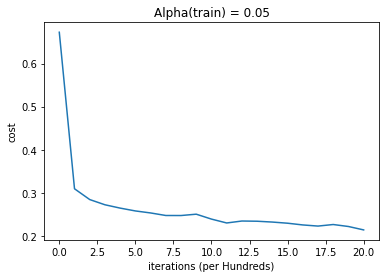


accuracy of train: 0.9244791666666667


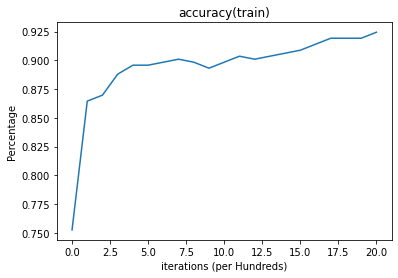


cost of validation: 0.3146955830738819


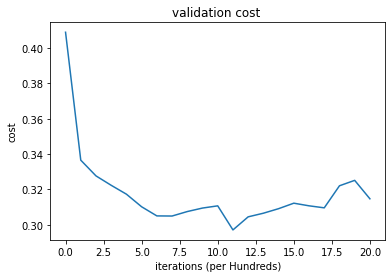


accuracy of validation: 0.8958333333333334


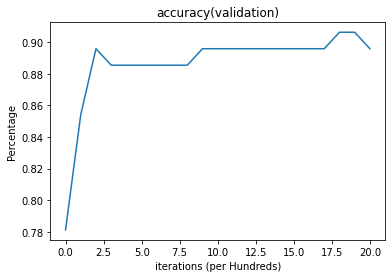

In [ ]:
layers = [16, 14, 1]
parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.05, epoch = 2000, print_cost = True)


### **5 layers model**


Cost after iteration 0: 0.692929
Cost after iteration 100: 0.653126
Cost after iteration 200: 0.628721
Cost after iteration 300: 0.613267
Cost after iteration 400: 0.602228
Cost after iteration 500: 0.587101
Cost after iteration 600: 0.496345
Cost after iteration 700: 0.455717
Cost after iteration 800: 0.427933
Cost after iteration 900: 0.409197
Cost after iteration 1000: 0.395189
Cost after iteration 1100: 0.382740
Cost after iteration 1200: 0.371708
Cost after iteration 1300: 0.361979
Cost after iteration 1400: 0.353104
Cost after iteration 1500: 0.344725
Cost after iteration 1600: 0.337168
Cost after iteration 1700: 0.330592
Cost after iteration 1800: 0.324937
Cost after iteration 1900: 0.320008
Cost after iteration 2000: 0.315686
Cost after iteration 2100: 0.311794
Cost after iteration 2200: 0.308222
Cost after iteration 2300: 0.304853
Cost after iteration 2400: 0.301615
Cost after iteration 2500: 0.298446
Cost after iteration 2600: 0.295243
Cost after iteration 2700: 0.291968
Cost

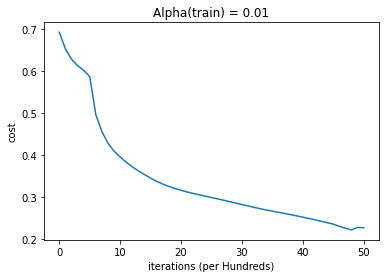


accuracy of train: 0.921875


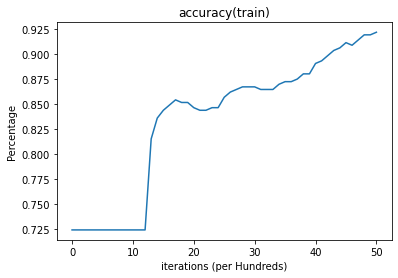


cost of validation: 0.33298186219949477


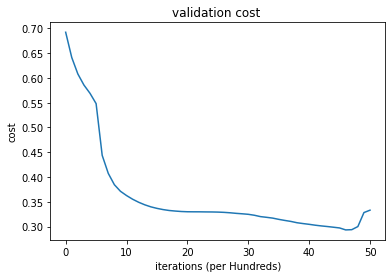


accuracy of validation: 0.875


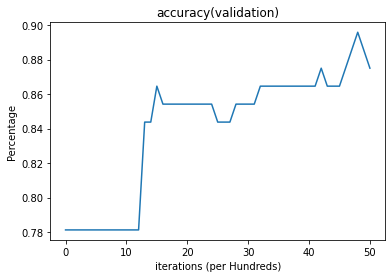

In [ ]:
layers = [16,14,11,9, 1]
parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.01,epoch = 5000 , print_cost = True)
print()
print()
p = predict(X_val, y_val, parm)


### **2 layers model**


Cost after iteration 0: 3.351106
Cost after iteration 100: 0.389707
Cost after iteration 200: 0.377777
Cost after iteration 300: 0.371730
Cost after iteration 400: 0.367287
Cost after iteration 500: 0.363535
Cost after iteration 600: 0.360204
Cost after iteration 700: 0.357186
Cost after iteration 800: 0.354424
Cost after iteration 900: 0.351880
Cost after iteration 1000: 0.349527
Cost after iteration 1100: 0.347346
Cost after iteration 1200: 0.345320
Cost after iteration 1300: 0.343435
Cost after iteration 1400: 0.341679
Cost after iteration 1500: 0.340042
Cost after iteration 1600: 0.338512
Cost after iteration 1700: 0.337083
Cost after iteration 1800: 0.335747
Cost after iteration 1900: 0.334495
Cost after iteration 2000: 0.333322
Cost after iteration 2100: 0.332221
Cost after iteration 2200: 0.331187
Cost after iteration 2300: 0.330216
Cost after iteration 2400: 0.329302
Cost after iteration 2500: 0.328441
Cost after iteration 2600: 0.327629
Cost after iteration 2700: 0.326863
Cost

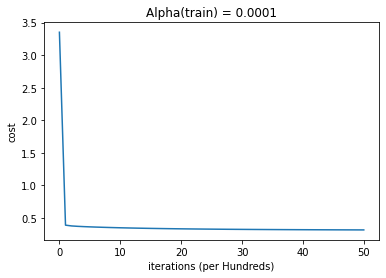


accuracy of train: 0.84375


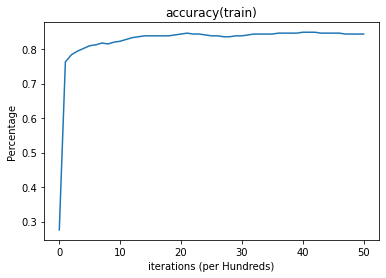


cost of validation: 0.3335943224229985


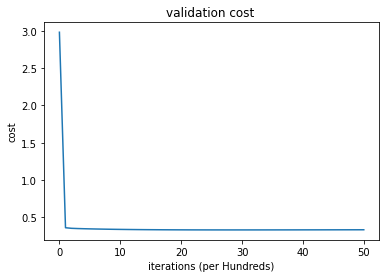


accuracy of validation: 0.8645833333333334


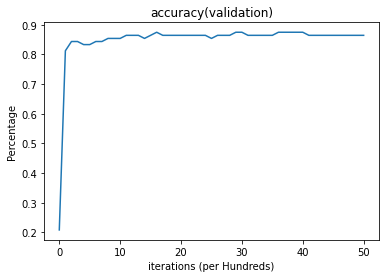

In [ ]:
layers = [16, 1]

parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.0001,epoch = 5000 , print_cost = True)
print()
print()
p = predict(X_val, y_val, parm)



# ***zero initializataion***





### **3 layers model**


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.599591
Cost after iteration 200: 0.590424
Cost after iteration 300: 0.589337
Cost after iteration 400: 0.589197
Cost after iteration 500: 0.589179
Cost after iteration 600: 0.589176
Cost after iteration 700: 0.589176
Cost after iteration 800: 0.589176
Cost after iteration 900: 0.589176
Cost after iteration 1000: 0.589176
Cost after iteration 1100: 0.589176
Cost after iteration 1200: 0.589176
Cost after iteration 1300: 0.589176
Cost after iteration 1400: 0.589176
Cost after iteration 1500: 0.589176
Cost after iteration 1600: 0.589176
Cost after iteration 1700: 0.589176
Cost after iteration 1800: 0.589176
Cost after iteration 1900: 0.589176
Cost after iteration 2000: 0.589176


cost of train: 0.5891758505515907


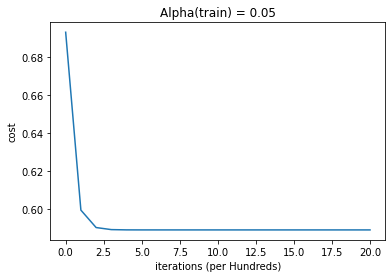


accuracy of train: 0.7239583333333333


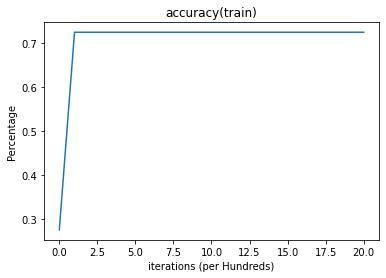


cost of validation: 0.5339362557664736


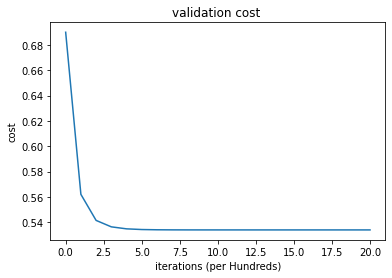


accuracy of validation: 0.78125


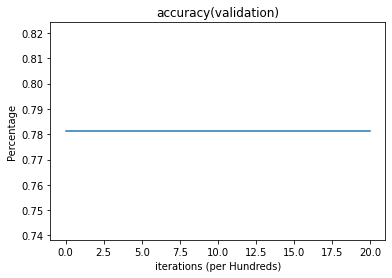

In [ ]:
layers = [16, 14, 1]
parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.05, epoch = 2000, print_cost = True,param_initialize = "zero" )
print()
print()
p = predict(X_val, y_val, parm)

### **5 layers model**


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.653623
Cost after iteration 200: 0.629546
Cost after iteration 300: 0.614731
Cost after iteration 400: 0.605509
Cost after iteration 500: 0.599701
Cost after iteration 600: 0.596006
Cost after iteration 700: 0.593634
Cost after iteration 800: 0.592100
Cost after iteration 900: 0.591101
Cost after iteration 1000: 0.590448
Cost after iteration 1100: 0.590018
Cost after iteration 1200: 0.589735
Cost after iteration 1300: 0.589548
Cost after iteration 1400: 0.589423
Cost after iteration 1500: 0.589341
Cost after iteration 1600: 0.589286
Cost after iteration 1700: 0.589249
Cost after iteration 1800: 0.589225
Cost after iteration 1900: 0.589209
Cost after iteration 2000: 0.589198
Cost after iteration 2100: 0.589191
Cost after iteration 2200: 0.589186
Cost after iteration 2300: 0.589182
Cost after iteration 2400: 0.589180
Cost after iteration 2500: 0.589179
Cost after iteration 2600: 0.589178
Cost after iteration 2700: 0.589177
Cost

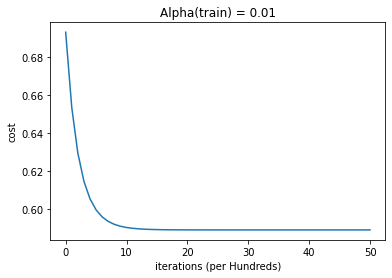


accuracy of train: 0.7239583333333333


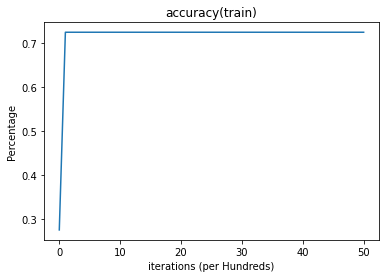


cost of validation: 0.533938346487721


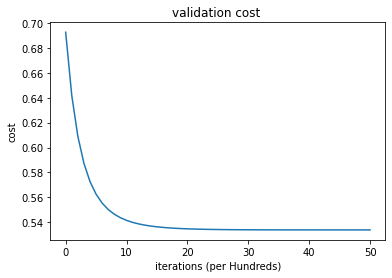


accuracy of validation: 0.78125


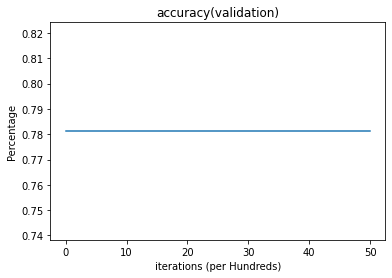

In [ ]:
layers = [16,14,11,9, 1]
parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.01,epoch = 5000 , print_cost = True,param_initialize = "zero")
print()
print()
p = predict(X_val, y_val, parm)

### **2 layers model**


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.381159
Cost after iteration 200: 0.371189
Cost after iteration 300: 0.366299
Cost after iteration 400: 0.362622
Cost after iteration 500: 0.359401
Cost after iteration 600: 0.356456
Cost after iteration 700: 0.353731
Cost after iteration 800: 0.351202
Cost after iteration 900: 0.348851
Cost after iteration 1000: 0.346663
Cost after iteration 1100: 0.344627
Cost after iteration 1200: 0.342730
Cost after iteration 1300: 0.340961
Cost after iteration 1400: 0.339311
Cost after iteration 1500: 0.337770
Cost after iteration 1600: 0.336330
Cost after iteration 1700: 0.334983
Cost after iteration 1800: 0.333722
Cost after iteration 1900: 0.332541
Cost after iteration 2000: 0.331434
Cost after iteration 2100: 0.330394
Cost after iteration 2200: 0.329417
Cost after iteration 2300: 0.328498
Cost after iteration 2400: 0.327634
Cost after iteration 2500: 0.326819
Cost after iteration 2600: 0.326050
Cost after iteration 2700: 0.325324
Cost

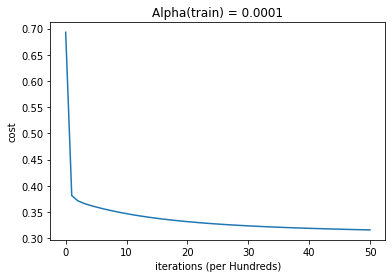


accuracy of train: 0.84375


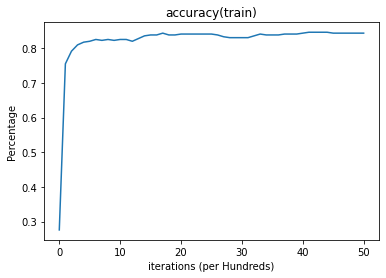


cost of validation: 0.3355186523275982


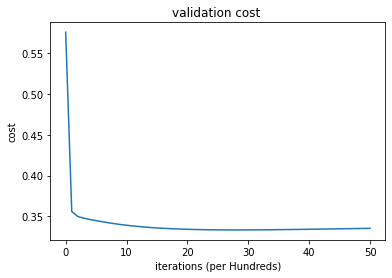


accuracy of validation: 0.8541666666666667


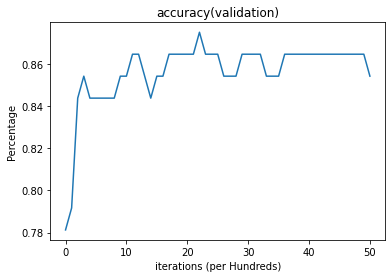

In [ ]:
layers = [16, 1]

parm = model(X_train, y_train, X_val, y_val, layers, alpha = 0.0001,epoch = 5000 , print_cost = True,param_initialize = "zero")
print()
print()
p = predict(X_val, y_val, parm)